In [191]:
#preamble

In [192]:


%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>



# Hypothesis Testing (Continued)

Lets actually examine the textbook:
https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html

You know the URL that no-one reads, perhaps because there is a "secret" module you need to install, without instructions of how!  Welcome to the world of obfuscation!

To get access to the datascience library in the textbook you use pip. On my server I did:

    sudo -H /opt/conda/envs/python/bin/python -m pip install datascience
    

In [175]:
import datascience
import matplotlib.pyplot 

## Mendel's Pea Flowers

Gregor Mendel (1822-1884) was an Austrian monk who is widely recognized as the founder of the modern field of genetics. Mendel performed careful and large-scale experiments on plants to come up with fundamental laws of genetics.

Many of his experiments were on varieties of pea plants. He formulated sets of assumptions about each variety; these were his models. He then tested the validity of his models by growing the plants and gathering data.

Let's analyze the data from one such experiment to see if Mendel's model was good.

In a particular variety, each plant has either purple flowers or white. The color in each plant is unaffected by the colors in other plants. Mendel hypothesized that the plants should bear purple or white flowers at random, in the ratio 3:1.
### Mendel's Model

For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in all the other plants.
Approach to Assessment

To go about assessing Mendel's model, we can simulate plants under the assumptions of the model and see what it predicts. Then we will be able to compare the predictions with the data that Mendel recorded.
The Statistic

Our goal is to see whether or not Mendel's model is good. We need to simulate a statistic that will help us make this decision.

If the model is good, the percent of purple-flowering plants in the sample should be close to 75%. If the model is not good, the percent purple-flowering will be away from 75%. It may be higher, or lower; the direction doesn't matter.

The key for us is the distance between 75% and the percent of purple-flowering plants in the sample. Big distances are evidence that the model isn't good.

Our statistic, therefore, is the distance between the sample percent and 75%:

$$∣sample percent of purple-flowering plants−75∣$$

### Predicting the Statistic Under the Model

To see how big the distance would be if Mendel's model were true, we can use sample_proportions to simulate the distance under the assumptions of the model.

First, we have to figure out how many times to sample. To do this, remember that we are going to compare our simulation with Mendel's plants. So we should simulate the same number of plants that he had.

Mendel grew a lot of plants. There were 929 plants of the variety corresponding to this model. So we have to sample 929 times.
Generating One Value of the Statistic

The steps in the calculation:

    Sample 929 times at random from the distribution specified by the model and find the sample proportion in the purple-flowering category.
    Multiply the proportion by 100 to get a pecent.
    Subtract 75 and take the absolute value of the difference.

That's the statistic: the distance between the sample percent and 75.

We will start by defining a function that takes a proportion and returns the absolute difference between the corresponding percent and 75.


In [193]:
def distance_from_75(p):
    return abs(100*p - 75)

To simulate one value of the distance between the sample percent of purple-flowering plants and 75%, under the assumptions of Mendel's model, we have to first simulate the proportion of purple-flowering plants among 929 plants under the assumption of the model, and then calculate the discrepancy from 75%.

In [194]:
model_proportions = [0.75, 0.25]

In [197]:
proportion_purple_in_sample = datascience.sample_proportions(929, model_proportions).item(0)
distance_from_75(proportion_purple_in_sample)
#proportion_purple_in_sample

0.13455328310010373

That's one simulated value of the distance between the sample percent of purple-flowering plants and 75% as predicted by Mendel's model.
### Running the Simulation

To get a sense of how variable the distance could be, we have to simulate it many more times.

We will generate 10,000 values of the distance. As before, we will first use the code we developed above to define a function that returns one simulated value Mendel's hypothesis.


In [205]:
def one_simulated_distance():
    proportion_purple_in_sample = datascience.sample_proportions(929, model_proportions).item(0)
    return distance_from_75(proportion_purple_in_sample)

Next, we will use a for loop to create 10,000 such simulated distances.

In [207]:
distances = datascience.make_array()

repetitions = 10000
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

### The Prediction

The empirical histogram of the simulated values shows the distribution of the distance as predicted by Mendel's model.


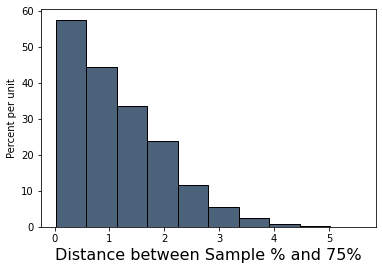

In [208]:
datascience.Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()



Look on the horizontal axis to see the typical values of the distance, as predicted by the model. They are rather small. For example, a high proportion of the distances are in the range 0 to 1, meaning that for a high proportion of the samples, the percent of purple-flowering plants is within 1% of 75%, that is, the sample percent is in the range 74% to 76%.

### Comparing the Prediction and the Data

To assess the model, we have to compare this prediction with the data. Mendel recorded the number of purple and white flowering plants. Among the 929 plants that he grew, 705 were purple flowering. That's just about 75.89%.


In [212]:
100*round(705 / 929, 4)

75.89

So the observed value of our statistic – the distance between Mendel's sample percent and 75 – is about 0.89:

In [214]:
observed_statistic = distance_from_75(705/929)
round(observed_statistic, 2)

0.89



Just by eye, locate roughly where 0.89 is on the horizontal axis of the histogram. You will see that it is clearly in the heart of the distribution predicted by Mendel's model.

The cell below redraws the histogram with the observed value plotted on the horizontal axis.


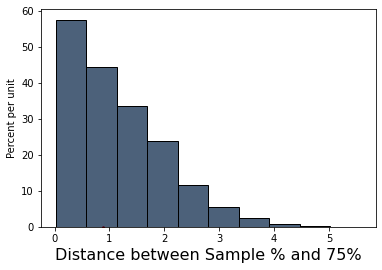

In [218]:
datascience.Table().with_column(
    'Distance between Sample % and 75%', distances
).hist() 
matplotlib.pyplot.scatter(observed_statistic, 0.00, color='red', s=3);

The observed statistic is like a typical distance predicted by the model. By this measure, the data are consistent with the histogram that we generated under the assumptions of Mendel's model. This is evidence in favor of the model.

Hypothesis tests are conducted in all fields in which theory can be compared to observation.

## Elements of a Statistical Test
The four essential elements are:

1. null hypothesis, $H_0$
2. alternative hypothesis, $H_a$
3. a test statistic 
4. a rejection region

### 

Suppose we wish to test a hypothesis concerning a parameter $\theta$ based on a random sample $Y_1,Y_2, \dots ,Y_n$ from which we compute an estimate named $\hat\theta$.  Assume for this lesson that the estimator has an approximately normical distribution with mean $\theta$ and variance $\sigma_{\hat\theta}^2$

Suppose $\theta_0$ is a particular (target) value of $\theta$, we wish to test $H_0:\theta = \theta_0$ versus $H_a:\theta > \theta_0$.

The figure below depicts sampling distributions of $\hat\theta$ for different values of $\theta$, including one that happens to center on $\theta_0$

![](samplngDists.png)

If $\hat\theta$ is close to $\theta_0$, it is reasonable to accept  $H_0$. 
However if $\theta > \theta_0$, it is more likely that $\hat\theta$ is going to be large.

Thus large values of $\hat\theta$ (larger than $\theta_0$) favor the rejection of $H_0:\theta = \theta_0$ and the acceptance of $H_a:\theta > \theta_0$.  Using the 4 elements as a guide, we can concisely state :

|item|value| 
|:---|:---|
|$H_0$|$\theta = \theta_0$|
|$H_a$|$\theta > \theta_0$|
|Test Statistic|$\hat\theta$|
|Rejection Region|$RR = \hat\theta > k$ for some choice of $k$|

The actual value of $RR$ is determined by setting the type-I-error prbability $\alpha$ and choosing $k$ accordingly, such as in the figure below.

![](type1.png)

If $H_0$ is true, $\hat\theta$ having an approximately normal distribution with mean $\theta_0$ and variance $\sigma_{\hat\theta}^2$, if we desire a type-I-error probability of $\alpha$ then

$$k = \theta_0 + z_{\alpha} \sigma_{\hat\theta}$$

is the choice for $k$ where $P(Z > z_{\alpha}) = \alpha $ when $Z$ is a standard normal variate (our firend the Z-score).

Our $RR$ can be expressed as:

$$ RR = \hat\theta : \frac{\hat\theta - \theta_0}{\sigma_{\hat\theta}} > z_{\alpha}$$

Thus our test is:

|item|value| 
|:---|:------|
|$H_0$|$\theta = \theta_0$|
|$H_a$|$\theta> \theta_0$|
|Test Statistic|$Z=\frac{\hat\theta-\theta_0}{\sigma_{\hat\theta}}$ |
|Rejection Region|$z>z_{\alpha}$ for some value $\alpha$|

Recall we choose $\alpha$

### Example

A machine in a factory must be stopped and maintained when its defects exceede 10% on the daily production runs.   A random sample of 100 items from one day of production contain 15 defective items and the shop foreman claims the machine must be maintained/repaired.  Does the sample evidence support the foreman's assertion?

Lets apply our process.

$Y$ denotes the number of defectives.  $Y$ will be a binomial variate (with value TRUE/FALSE or 0/1) with a probability of one outcome of $p$ and the other $1-p$.  Kind of like an oddly weighted coin.  Lets say the defect outcome is the value $p$. We will assume 100 is large enough so that we can approximate the binomial with a Z-score statistic.

|item|value| 
|:---|:---|
|$H_0$|$p = 0.10$|
|$H_a$|$p > 0.10$|
|Test Statistic|$$Z=\frac{\hat p-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$$ |
|Rejection Region|$z>z_{\alpha}$ for some value $\alpha$|

Lets choose $\alpha = 0.01$ what is the value for $z_{\alpha}$?

In [245]:
import math
def normdist(x,mu,sigma):
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist

sample_count = 100
defect_count = 15
phat = defect_count/sample_count
pzero = 0.10

z_test = (phat - pzero) / math.sqrt((pzero*(1.0-pzero))/(sample_count))

z_alpha =  2.325 #2.325 #here we find by trial and error
quantile = 1-normdist(z_alpha,0,1)
# print(quantile)
if z_test > z_alpha:
    print("Reject Ho","Test Statistic = ",round(z_test,3), "Rejection Value = ",round(z_alpha,3)," Type-I-error probability = ",round(quantile,6))
else:
    print("Do Not Reject Ho","Test Statistic = ",round(z_test,3), "Rejection Value = ",round(z_alpha,3)," Type-I-error probability = ",round(quantile,6))

# or we can compute p-value

pvalue = 1-normdist(z_test,0,1)

print("P-value at rejection = ",round(pvalue,6))
    

Do Not Reject Ho Test Statistic =  1.667 Rejection Value =  2.325  Type-I-error probability =  0.010036
P-value at rejection =  0.04779


Now lets examine the actual defect distribution by simulation

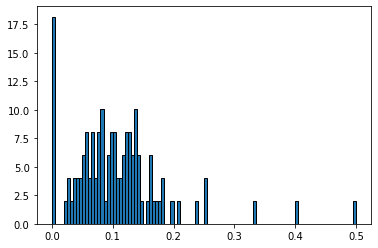

In [255]:
import random
import matplotlib.pyplot as plt

def sample_parts(how_many,proportion):
    sample_list = [] #empty list to store results
    for i in range(0,how_many):
        temp = random.uniform(0, 1)
        if temp <= proportion:
            sample_list.append(0)
        else:
            sample_list.append(1)
    return(sample_list)

#machine_parts = sample_parts(100,0.10)
#plt.hist(machine_parts, density = False)
#plt.show()

# simulate sampling then computing the defect rate
defect_rate = []

for j in range(1,100): #change from 10 to 50,70,90,100,1000,2000,3000
    machine_parts = sample_parts(j,0.10)
    sample_count = len(machine_parts)
    defect_count = sample_count - sum(machine_parts)
    defect_rate.append(defect_count/sample_count)

plt.hist(defect_rate,bins=100,density = True)
plt.show()

### A/B Testing

In modern data analytics, deciding whether two numerical samples come from the same underlying distribution is called A/B testing. The name refers to the labels of the two samples, A and B.

We have already addressed this kind of comparison, and will do more in the laboratory, in fact we went further and even postulated some kinds of distribution data models that explain the data.